In [58]:
# Read the Data
customerTransactions<-read.csv("C:/Users/busea/Downloads/CustomerTransactions.csv",header=T)

# Show the first few rows of the data
head(customerTransactions)

#Show attributes  
attributes(customerTransactions)

ID,CustomerLastName,X1,X2,X3,X4,X5,X6,X7,X8,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
1,Adams,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,Allen,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,Anderson,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
4,Bailey,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5,Baker,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
6,Barnes,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


$names
 [1] "ID"               "CustomerLastName" "X1"               "X2"              
 [5] "X3"               "X4"               "X5"               "X6"              
 [9] "X7"               "X8"               "X9"               "X10"             
[13] "X11"              "X12"              "X13"              "X14"             
[17] "X15"              "X16"              "X17"              "X18"             
[21] "X19"              "X20"              "X21"              "X22"             
[25] "X23"              "X24"              "X25"              "X26"             
[29] "X27"              "X28"              "X29"              "X30"             
[33] "X31"              "X32"             

$class
[1] "data.frame"

$row.names
  [1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
 [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
 [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
 [91]  91  92  93  94  95  96  97  98  99 100

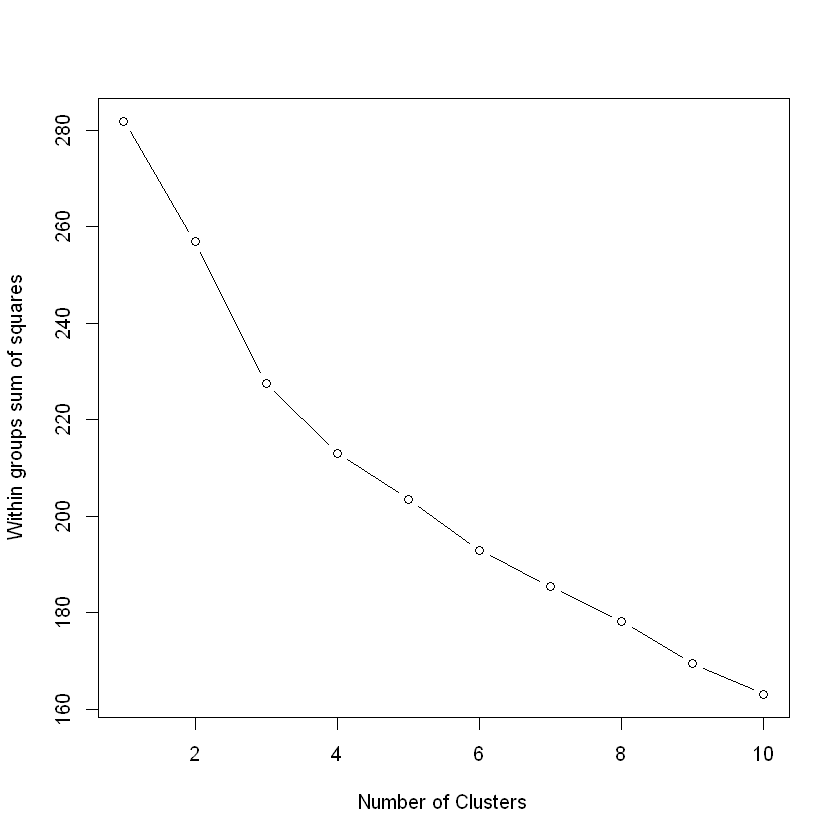

In [59]:
#Elbow criterion      

wssplot <- function(data, nc=15, seed=1234)
{
  wss <- (nrow(data)-1)*sum(apply(data,2,var))
  for (i in 2:nc)
  {
    set.seed(seed)
    wss[i] <- sum(kmeans(data, centers=i)$withinss) 
  }
  plot(1:nc, wss, type="b", xlab="Number of Clusters",ylab="Within groups sum of squares")
} 

wssplot(customerTransactions[,3:34], nc=10)

In [60]:
# Kmeans Clustering model fitting
model1 <- kmeans(customerTransactions[,3:34], 3) # k = 3
summary(model1)

             Length Class  Mode   
cluster      100    -none- numeric
centers       96    -none- numeric
totss          1    -none- numeric
withinss       3    -none- numeric
tot.withinss   1    -none- numeric
betweenss      1    -none- numeric
size           3    -none- numeric
iter           1    -none- numeric
ifault         1    -none- numeric

In [61]:
#Model attributes 
attributes(model1) 

$names
[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

$class
[1] "kmeans"

In [62]:
# Clusters:
model1$cluster

[1] 1 3 2 1 3 3 2 1 3 1 3 2 1 3 3 2 3 2 1 3 1 1 3 3 2 3 3 3 3 2 1 1 3 3 1 1 3
 [38] 1 3 1 2 2 1 3 1 3 1 1 3 3 3 3 3 2 3 1 2 1 1 3 3 1 3 1 1 2 2 3 3 3 3 3 3 1
 [75] 3 1 2 1 1 2 3 3 3 2 1 1 1 3 3 1 3 1 3 1 3 3 1 3 3 3

In [63]:
# Cluster size:
model1$size

[1] 35 16 49

In [64]:
# Assign cluster number to the original data:
customerTransactions1<-cbind(customerTransactions,Cluster=model1$cluster)

model1$withinss

[1]  59.42857  19.31250 148.81633

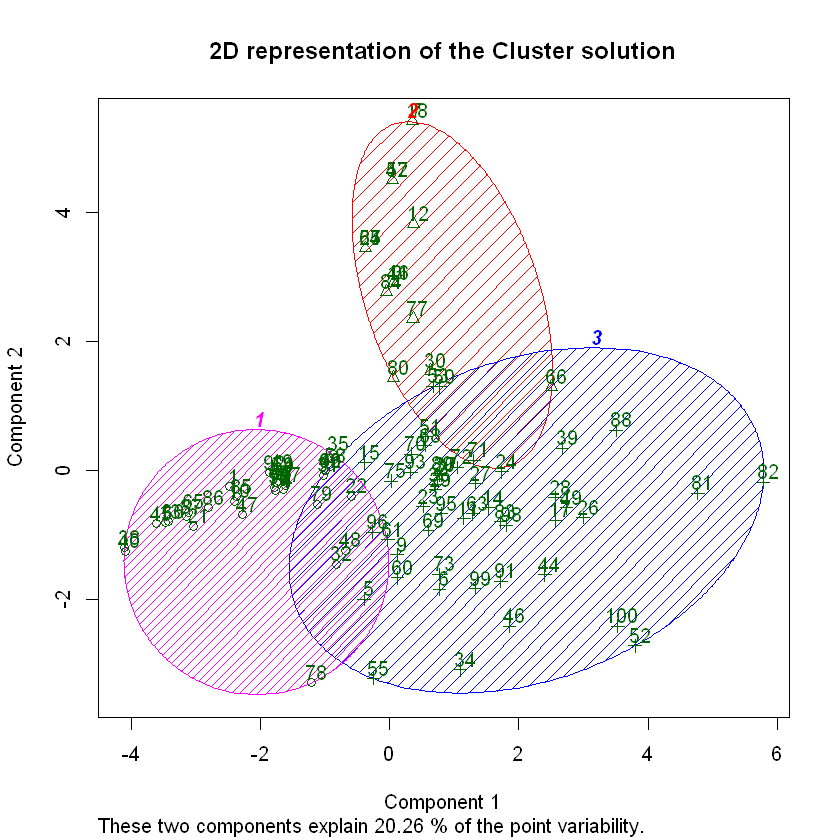

In [65]:
#install.packages("cluster")
library(cluster)

# Plot Cluster
clusplot(customerTransactions1[,3:34], model1$cluster, main='2D representation of the Cluster solution',
         color=TRUE, shade=TRUE,
         labels=2, lines=0)

In [66]:
model2 <- kmeans(customerTransactions[,3:34], 4) # k = 4
summary(model2)

             Length Class  Mode   
cluster      100    -none- numeric
centers      128    -none- numeric
totss          1    -none- numeric
withinss       4    -none- numeric
tot.withinss   1    -none- numeric
betweenss      1    -none- numeric
size           4    -none- numeric
iter           1    -none- numeric
ifault         1    -none- numeric

In [67]:
#Model attributes 
attributes(model2) 

$names
[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

$class
[1] "kmeans"

In [68]:
# Clusters:
model2$cluster

[1] 1 1 1 1 2 2 1 1 2 1 2 1 1 2 1 1 4 1 1 2 1 1 2 2 1 3 3 4 2 1 1 1 2 2 1 1 2
 [38] 1 3 1 1 1 1 4 1 2 1 1 4 1 1 3 1 1 2 1 1 1 1 2 2 1 4 1 1 3 1 1 2 1 3 1 2 1
 [75] 2 1 1 2 1 1 3 4 3 1 1 1 1 3 4 1 2 1 1 1 3 2 1 3 2 2

In [69]:
# Assign cluster number to the original data:
customerTransactions2<-cbind(customerTransactions,Cluster=model2$cluster)

model2$withinss

[1] 115.68966  64.50000  31.63636  20.28571

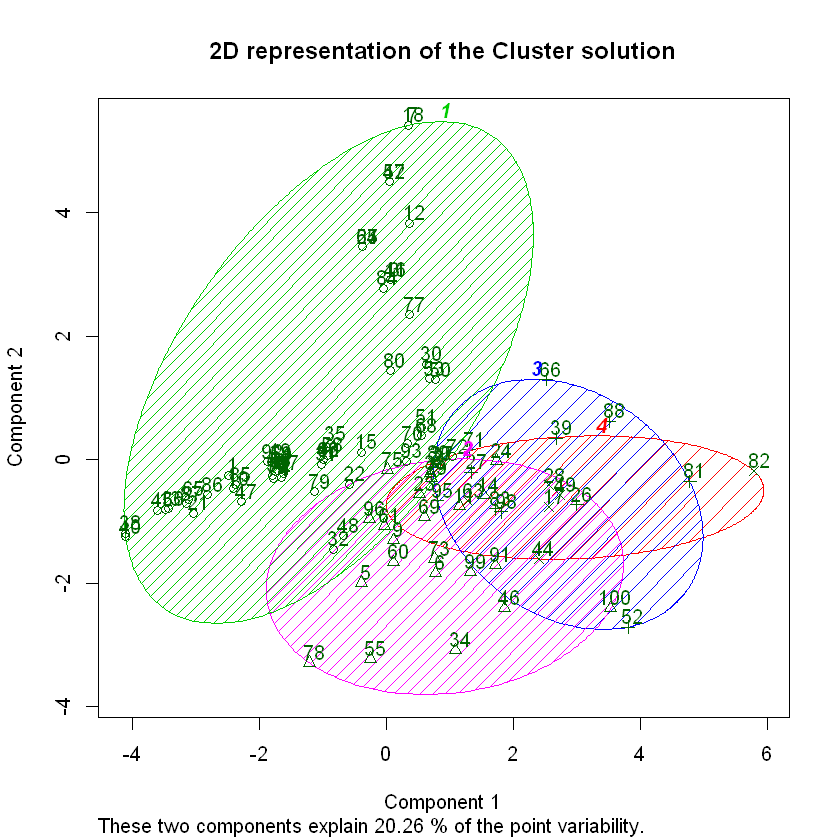

In [75]:
# Plot Cluster
clusplot(customerTransactions2[,3:34], model2$cluster, main='2D representation of the Cluster solution',
         color=TRUE, shade=TRUE,
         labels=2, lines=0)

In [71]:
# Show cities and their corresponding clusters:
table(customerTransactions1[,2],model1$cluster)
table(customerTransactions2[,2],model2$cluster)

            
             1 2 3
  Adams      1 0 0
  Allen      0 0 1
  Anderson   0 1 0
  Bailey     1 0 0
  Baker      0 0 1
  Barnes     0 0 1
  Bell       0 1 0
  Bennett    1 0 0
  Brooks     0 0 1
  Brown      1 0 0
  Butler     0 0 1
  Campbell   0 1 0
  Carter     1 0 0
  Clark      0 0 1
  Collins    0 0 1
  Cook       0 1 0
  Cooper     0 0 1
  Cox        0 1 0
  Cruz       1 0 0
  Davis      0 0 1
  Diaz       1 0 0
  Edwards    1 0 0
  Evans      0 0 1
  Fisher     0 0 1
  Flores     0 1 0
  Foster     0 0 1
  Garcia     0 0 1
  Gomez      0 0 1
  Gonzalez   0 0 1
  Gray       0 1 0
  Green      1 0 0
  Gutierrez  1 0 0
  Hall       0 0 1
  Harris     0 0 1
  Her0ndez   1 0 0
  Hill       1 0 0
  Howard     0 0 1
  Hughes     1 0 0
  Jackson    0 0 1
  James      1 0 0
  Jenkins    0 1 0
  Johnson    0 1 0
  Jones      1 0 0
  Kelly      0 0 1
  King       1 0 0
  Lee        0 0 1
  Lewis      1 0 0
  Long       1 0 0
  Lopez      0 0 1
  Martin     0 0 1
  Martinez   0 0 1

            
             1 2 3 4
  Adams      1 0 0 0
  Allen      1 0 0 0
  Anderson   1 0 0 0
  Bailey     1 0 0 0
  Baker      0 1 0 0
  Barnes     0 1 0 0
  Bell       1 0 0 0
  Bennett    1 0 0 0
  Brooks     0 1 0 0
  Brown      1 0 0 0
  Butler     0 1 0 0
  Campbell   1 0 0 0
  Carter     1 0 0 0
  Clark      0 1 0 0
  Collins    1 0 0 0
  Cook       1 0 0 0
  Cooper     0 0 0 1
  Cox        1 0 0 0
  Cruz       1 0 0 0
  Davis      0 1 0 0
  Diaz       1 0 0 0
  Edwards    1 0 0 0
  Evans      0 1 0 0
  Fisher     0 1 0 0
  Flores     1 0 0 0
  Foster     0 0 1 0
  Garcia     0 0 1 0
  Gomez      0 0 0 1
  Gonzalez   0 1 0 0
  Gray       1 0 0 0
  Green      1 0 0 0
  Gutierrez  1 0 0 0
  Hall       0 1 0 0
  Harris     0 1 0 0
  Her0ndez   1 0 0 0
  Hill       1 0 0 0
  Howard     0 1 0 0
  Hughes     1 0 0 0
  Jackson    0 0 1 0
  James      1 0 0 0
  Jenkins    1 0 0 0
  Johnson    1 0 0 0
  Jones      1 0 0 0
  Kelly      0 0 0 1
  King       1 0 0 0
  Lee        0 1 0 0


     groups
      1 2 3
  1   1 0 0
  2   0 1 0
  3   0 0 1
  4   1 0 0
  5   1 0 0
  6   0 1 0
  7   0 0 1
  8   1 0 0
  9   0 1 0
  10  1 0 0
  11  0 1 0
  12  0 0 1
  13  1 0 0
  14  0 1 0
  15  0 1 0
  16  0 0 1
  17  0 1 0
  18  0 0 1
  19  1 0 0
  20  0 1 0
  21  1 0 0
  22  0 1 0
  23  0 1 0
  24  0 1 0
  25  0 0 1
  26  0 1 0
  27  0 1 0
  28  0 1 0
  29  0 1 0
  30  0 1 0
  31  1 0 0
  32  1 0 0
  33  0 1 0
  34  0 1 0
  35  1 0 0
  36  1 0 0
  37  0 1 0
  38  1 0 0
  39  0 1 0
  40  1 0 0
  41  0 0 1
  42  0 0 1
  43  1 0 0
  44  0 1 0
  45  1 0 0
  46  0 1 0
  47  1 0 0
  48  1 0 0
  49  0 1 0
  50  0 1 0
  51  0 1 0
  52  0 1 0
  53  0 0 1
  54  0 0 1
  55  0 1 0
  56  1 0 0
  57  0 0 1
  58  1 0 0
  59  1 0 0
  60  0 1 0
  61  0 1 0
  62  1 0 0
  63  0 1 0
  64  1 0 0
  65  1 0 0
  66  0 0 1
  67  0 0 1
  68  0 1 0
  69  0 1 0
  70  0 1 0
  71  0 1 0
  72  0 1 0
  73  0 1 0
  74  1 0 0
  75  0 1 0
  76  1 0 0
  77  0 0 1
  78  0 1 0
  79  1 0 0
  80  0 0 1
  81  0 1 0
  82

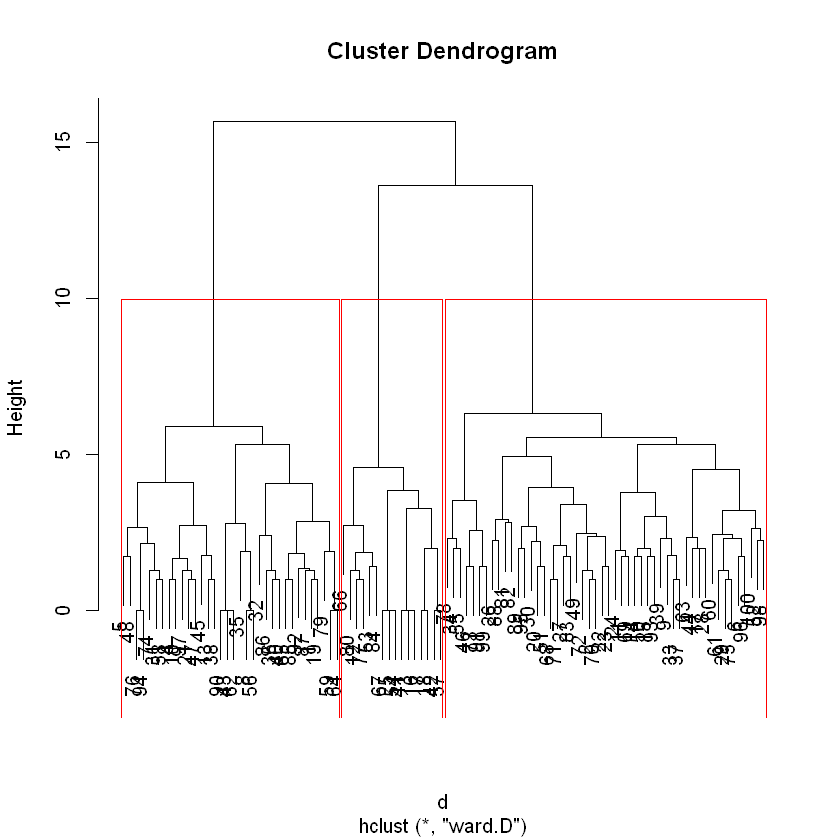

In [73]:
#Find Hierarchical clustering using Euclidean distance and wards method in matrix.
d <- dist(customerTransactions1[,3:34], method = "euclidean") 
H_Model1 <- hclust(d, method="ward.D")

# display dendogram
plot(H_Model1) 

# cut tree into 3 clusters
groups <- cutree(H_Model1, k=3)

# show groups
table(customerTransactions1[,1],groups)

# draw dendogram with red borders around the 3 clusters
rect.hclust(H_Model1, k=3, border="red") 

     groups
      1 2 3 4
  1   1 0 0 0
  2   0 1 0 0
  3   0 0 1 0
  4   1 0 0 0
  5   1 0 0 0
  6   0 1 0 0
  7   0 0 1 0
  8   1 0 0 0
  9   0 1 0 0
  10  1 0 0 0
  11  0 1 0 0
  12  0 0 1 0
  13  1 0 0 0
  14  0 1 0 0
  15  0 1 0 0
  16  0 0 1 0
  17  0 1 0 0
  18  0 0 1 0
  19  1 0 0 0
  20  0 1 0 0
  21  1 0 0 0
  22  0 1 0 0
  23  0 1 0 0
  24  0 1 0 0
  25  0 0 1 0
  26  0 1 0 0
  27  0 1 0 0
  28  0 1 0 0
  29  0 1 0 0
  30  0 1 0 0
  31  1 0 0 0
  32  1 0 0 0
  33  0 1 0 0
  34  0 0 0 1
  35  1 0 0 0
  36  1 0 0 0
  37  0 1 0 0
  38  1 0 0 0
  39  0 1 0 0
  40  1 0 0 0
  41  0 0 1 0
  42  0 0 1 0
  43  1 0 0 0
  44  0 1 0 0
  45  1 0 0 0
  46  0 0 0 1
  47  1 0 0 0
  48  1 0 0 0
  49  0 1 0 0
  50  0 1 0 0
  51  0 1 0 0
  52  0 1 0 0
  53  0 0 1 0
  54  0 0 1 0
  55  0 0 0 1
  56  1 0 0 0
  57  0 0 1 0
  58  1 0 0 0
  59  1 0 0 0
  60  0 1 0 0
  61  0 1 0 0
  62  1 0 0 0
  63  0 1 0 0
  64  1 0 0 0
  65  1 0 0 0
  66  0 0 1 0
  67  0 0 1 0
  68  0 1 0 0
  69  0 1 0 0
  70  0 

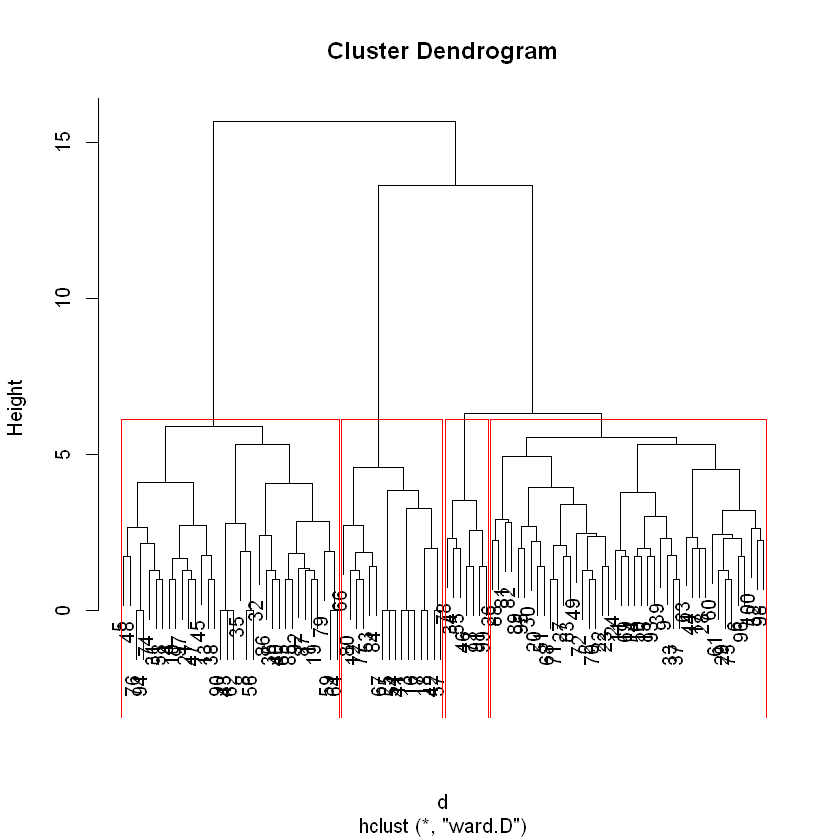

In [74]:
#Find Hierarchical clustering using Euclidean distance and wards method in matrix.
d <- dist(customerTransactions2[,3:34], method = "euclidean") 
H_Model2 <- hclust(d, method="ward.D")

# display dendogram
plot(H_Model2) 

# cut tree into 4 clusters
groups <- cutree(H_Model2, k=4)

# show groups
table(customerTransactions2[,1],groups)

# draw dendogram with red borders around the 4 clusters
rect.hclust(H_Model2, k=4, border="red") 